# Breast Cancer Classification
## Objectives:
* Clean data and determine training labels
* Split, scale, and standardize data
* Find best Hyperparameter for SVM and Logistic Regression
* Compare models before and after apply

# Import Libraries & Load Data

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings 
warnings.filterwarnings('ignore')


In [29]:
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
pd.set_option('max_columns', None)

In [30]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Data Cleaning

In [31]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [32]:
#remove unneccessary columns
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [33]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [34]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)


as we can see only the diagnosis column has non-numeric data, therefore, we can convert these labels to numeric values instead


In [35]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [36]:
data['diagnosis'].unique()

array([1, 0])

# Data Preprocessing

In [37]:
def preprocessing_inputs(df):
    df = df.copy()
    
    #Split DataFrame
    y = df['diagnosis']
    X = df.drop('diagnosis', axis=1)
    
    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=1)
    
    #Scale X
    scaler = StandardScaler()
    X_train = scaler.fit(X_train).transform(X_train)
    X_test = scaler.fit(X_test).transform(X_test)
    
    
    return X_train, X_test, y_train, y_test

In [38]:
X_train, X_test, y_train, y_test = preprocessing_inputs(data)

In [39]:
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (170, 30) (170,)
Test set: (399, 30) (399,)


# Model Training

## SVM

In [40]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [41]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [42]:
print('tuned hpyerparameters:' ,svm_cv.best_params_)
print('accuracy:','{:.2%}'.format(svm_cv.best_score_))

tuned hpyerparameters: {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy: 98.82%


## Logistic Regression

In [43]:
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2', 'l1'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logreg = LogisticRegression()

In [44]:
logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [45]:
print('Tuned paramters:', logreg_cv.best_params_)
print('Accuracy:', '{:.2%}'.format(logreg_cv.best_score_))

Tuned paramters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 98.82%


# Training Results

In [46]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Bengin', 'Malignant']); ax.yaxis.set_ticklabels(['Bengin', 'Malignant'])

In [47]:
yhat_svm = svm_cv.predict(X_test)
svm_acc = accuracy_score(y_test, yhat_svm)
print('Support Vector Machine Accuracy:', '{:.2%}'.format(svm_acc))

Support Vector Machine Accuracy: 95.99%


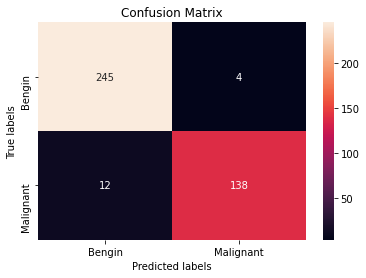

In [48]:
plot_confusion_matrix(y_test, yhat_svm)

In [49]:
yhat_log = logreg_cv.predict(X_test)
logreg_acc = accuracy_score(y_test, yhat_log)
print('Logistic Regression Accuracy:', '{:.2%}'.format(logreg_acc))

Logistic Regression Accuracy: 96.49%


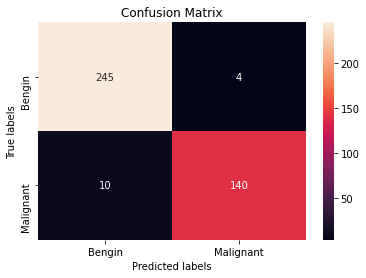

In [50]:
plot_confusion_matrix(y_test, yhat_log)

# Principle Component Analysis (PCA)

In [51]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X_train)

pca_train = pd.DataFrame(pca.transform(X_train), columns=['PC' + str(i + 1) for i in range(n_components)])
pca_test = pd.DataFrame(pca.transform(X_test), columns=['PC' + str(i + 1) for i in range(n_components)])

In [52]:
pca_train

,PC1,PC2,PC3
0,-3.241003,0.610893,1.703973
1,-2.213611,3.457067,3.543835
2,10.859494,-6.171821,10.150644
3,-3.705079,0.244811,0.740130
4,-3.427370,1.618374,2.431853
...,...,...,...
165,4.578288,-1.338516,-1.417834
166,-4.129459,-1.150857,0.764921
167,5.332065,0.990118,-2.624435
168,-2.201945,-1.353931,-0.068995


Text(0.5, 1.0, 'Principle Component Variance')

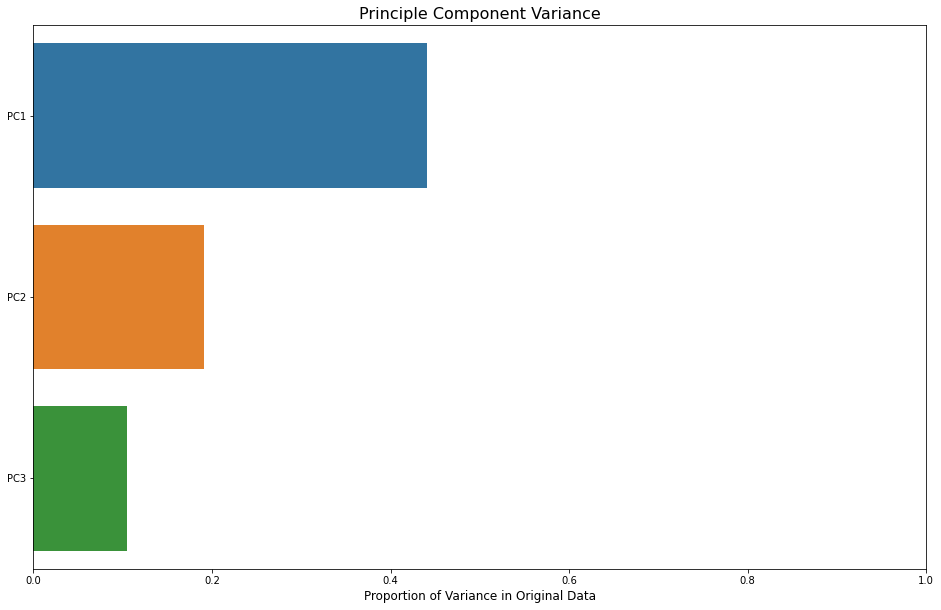

In [53]:
plt.figure(figsize=(16,10))
sns.barplot(x=pca.explained_variance_ratio_, y=['PC' + str(i + 1) for i in range(n_components)], orient='h', palette='tab10')
plt.xlim(0,1)
plt.xlabel('Proportion of Variance in Original Data', size=12)
plt.title('Principle Component Variance', size=16)

In [54]:
pca_svm = svm_cv.fit(pca_train, y_train)
pca_log = logreg_cv.fit(pca_train, y_train)

In [55]:
pca_svm_acc = pca_svm.score(pca_test, y_test)
pca_log_acc = pca_log.score(pca_test, y_test)

In [56]:
print('PCA Support Vector Machine Accuracy:', '{:.2%}'.format(pca_svm_acc))
print('PCA Logistic Regression Accuracy:', '{:.2%}'.format(pca_log_acc))

PCA Support Vector Machine Accuracy: 93.48%
PCA Logistic Regression Accuracy: 93.98%


# Compare Models

In [60]:
model_dict = {
            'models':['SVM', 'PCA SVM', 'Logistic Reg', 'PCA Logistic Reg'],
            'scores':[svm_acc, pca_svm_acc, logreg_acc, pca_log_acc]
}

In [61]:
model_df = pd.DataFrame.from_dict(model_dict)

Text(0.5, 1.0, 'Model Performance')

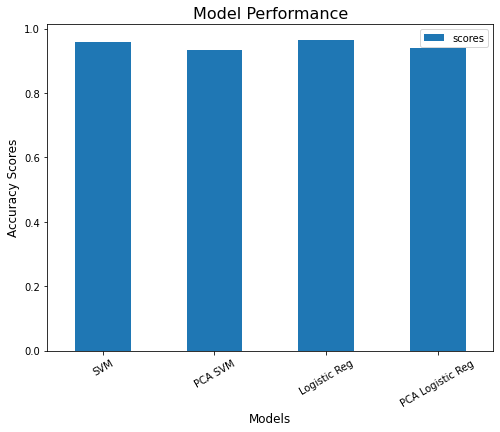

In [62]:
model_df.plot(kind='bar', x='models', y='scores', figsize=(8,6))
plt.xlabel('Models', size=12)
plt.xticks(rotation=30)
plt.ylabel('Accuracy Scores', size=12)
plt.title('Model Performance', size=16)